# Pergunta 1 e 2

<BarContainer object of 13 artists>

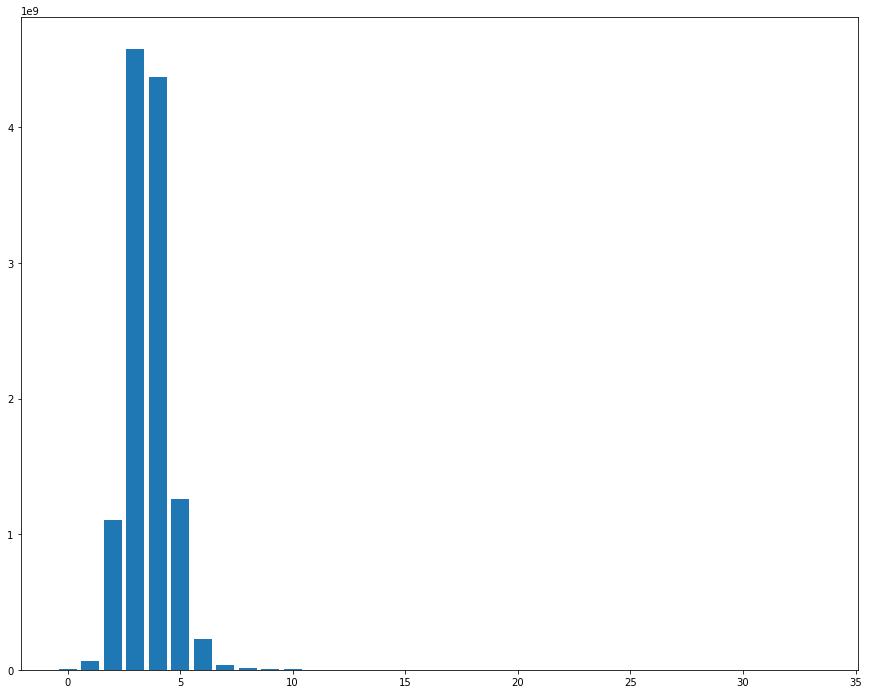

In [66]:
import pandas as pd 
from matplotlib import pyplot as plt

dataAula3 = pd.read_csv( 'C:/Users/PICHAU/Desktop/AnaliseDeDados/DataAnalysis/datasets/kc_house_data.csv' )

dataAula3['dormitory_type'] = 'standard'

dataAula3.loc[dataAula3['bedrooms']==1,'dormitory_type'] = 'studio'
dataAula3.loc[dataAula3['bedrooms']==2,'dormitory_type'] = 'apartament'
dataAula3.loc[dataAula3['bedrooms']>2,'dormitory_type'] = 'house'

priceByBedrooms = dataAula3[['price','bedrooms']].groupby( 'bedrooms' ).sum().reset_index()

pd.set_option('display.float_format', lambda x: '%.2f' % x)

plt.figure( figsize=(15, 12) )
plt.bar( priceByBedrooms['bedrooms'], priceByBedrooms['price'] )

# Pergunta 3

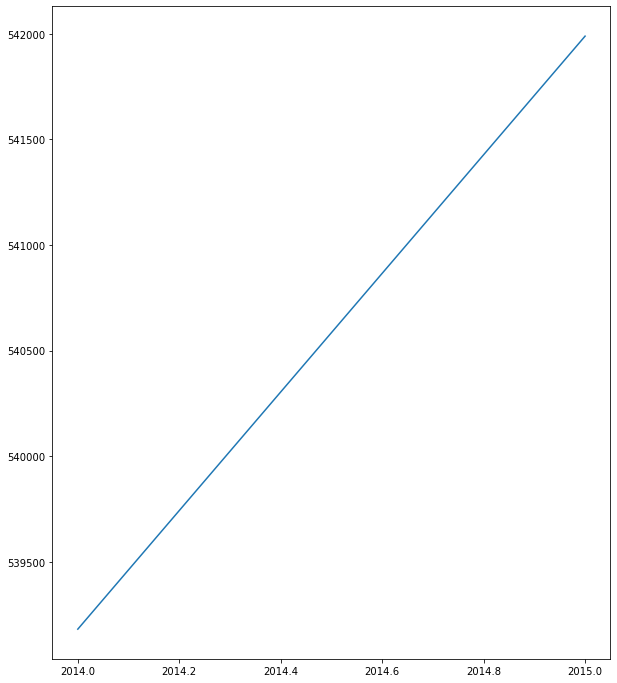

In [80]:
dataAula3['year'] = pd.to_datetime(dataAula3['date']).dt.year

by_year = dataAula3[['price','year']].groupby( 'year' ).mean().reset_index()

plt.figure( figsize=(10,12) )
plt.plot( by_year['year'], by_year['price'] )


# Pergunta 4

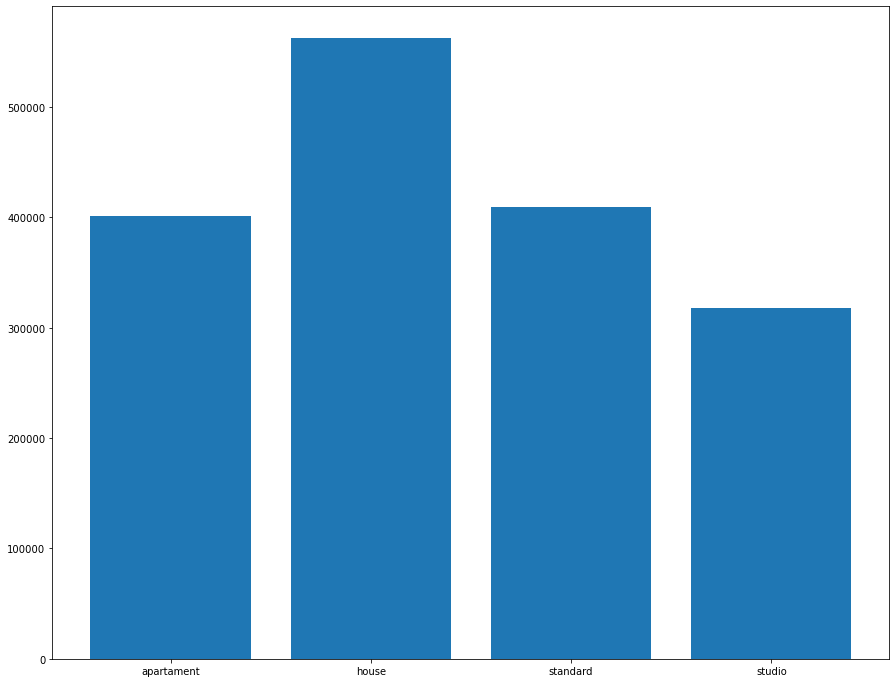

In [60]:

by_dormitory_type = dataAula3[['price','dormitory_type']].groupby( 'dormitory_type' ).mean().reset_index()

plt.figure( figsize=(15,12) )
plt.bar( by_dormitory_type['dormitory_type'], by_dormitory_type['price'] )


# Pergunta 5

<BarContainer object of 69 artists>

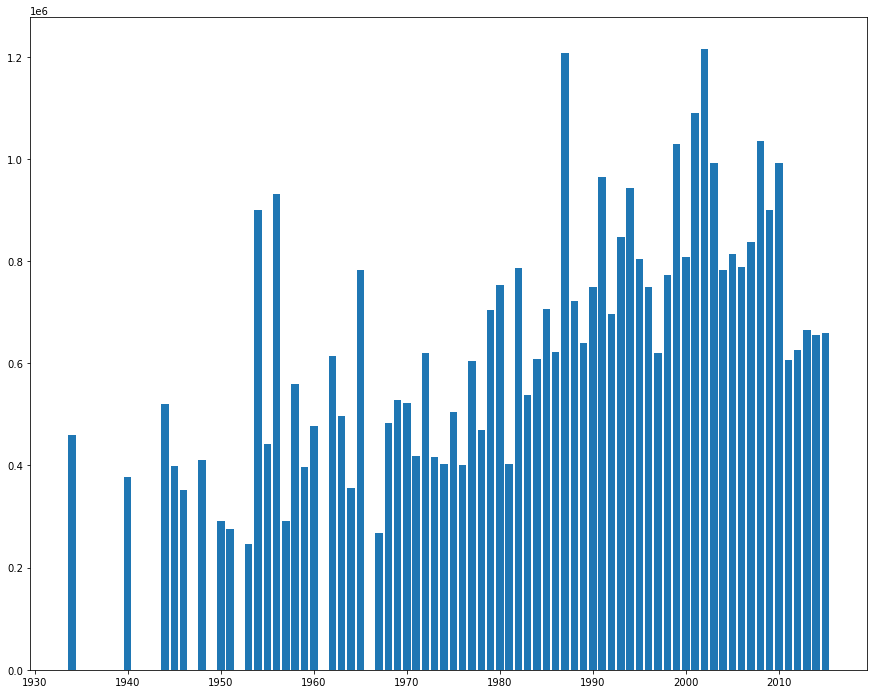

In [51]:
from numpy import int64
dataAula3['price'] = dataAula3['price'].astype( int64 )
by_renovated_year = dataAula3[dataAula3['yr_renovated']>1930][['price','yr_renovated']].groupby( 'yr_renovated' ).mean().reset_index()


plt.figure( figsize=(15,12) )
plt.bar( by_renovated_year['yr_renovated'], by_renovated_year['price'] )


# Pergunta 6

In [57]:

by_yr_built_and_dorm_type = dataAula3[['price','yr_built','dormitory_type']].groupby( ['yr_built','dormitory_type'] ).mean()

print(by_yr_built_and_dorm_type)

                            price
yr_built dormitory_type          
1900     apartament     589533.33
         house          584854.27
         studio         398944.00
1901     apartament     452856.40
         house          578619.17
...                           ...
2014     house          692687.72
         studio         516500.00
2015     apartament     543250.00
         house          797383.06
         studio         385195.00

[314 rows x 1 columns]


# Pergunta 7

<BarContainer object of 4 artists>

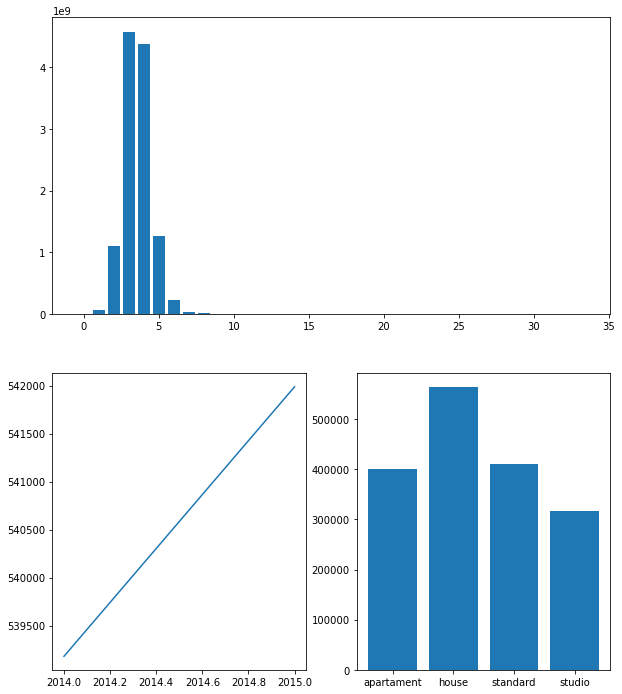

In [81]:
from matplotlib import gridspec

fig = plt.figure( figsize=( 10,12 ) )
specs = gridspec.GridSpec( ncols=2, nrows=2, figure=fig )

ax1 = fig.add_subplot( specs[0,:] )
ax2 = fig.add_subplot( specs[1,0] )
ax3 = fig.add_subplot( specs[1,1] )

#first graph
priceByBedrooms = dataAula3[['price','bedrooms']].groupby( 'bedrooms' ).sum().reset_index()

pd.set_option('display.float_format', lambda x: '%.2f' % x)


ax1.bar( priceByBedrooms['bedrooms'], priceByBedrooms['price'] )
        
#second graph
dataAula3['year'] = pd.to_datetime(dataAula3['date']).dt.year

by_year = dataAula3[['price','year']].groupby( 'year' ).mean().reset_index()


ax2.plot( by_year['year'], by_year['price'] )

#third graph        

by_dormitory_type = dataAula3[['price','dormitory_type']].groupby( 'dormitory_type' ).mean().reset_index()


ax3.bar( by_dormitory_type['dormitory_type'], by_dormitory_type['price'] )        

# Pergunta 8

<BarContainer object of 4 artists>

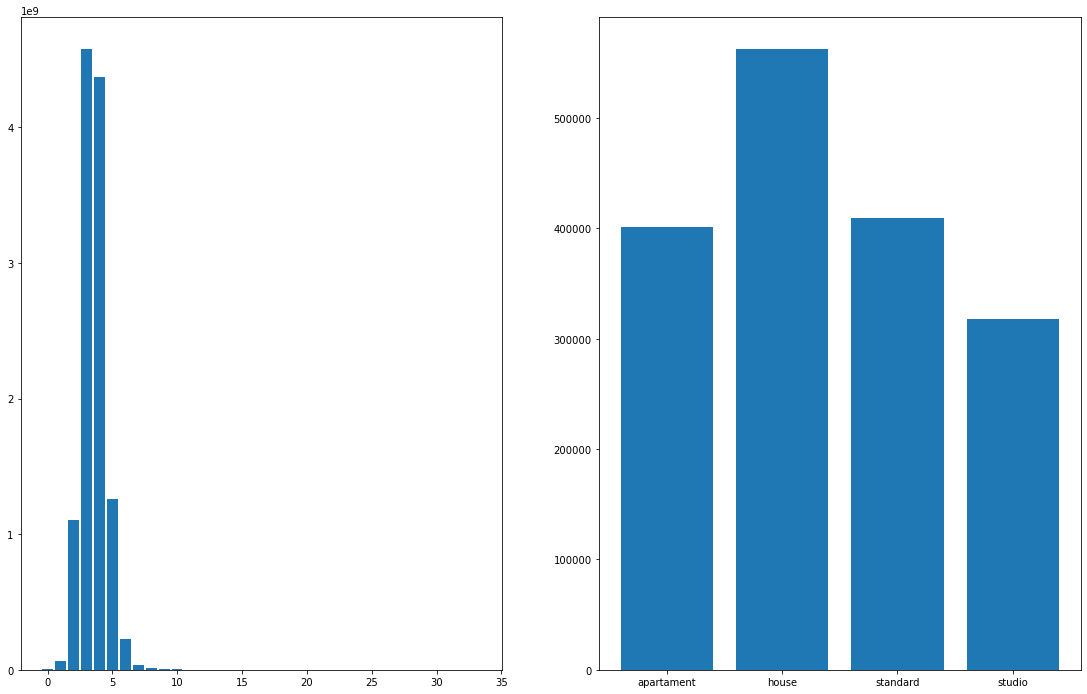

In [90]:
fig2 = plt.figure( figsize=( 19,12 ) )
specs2 = gridspec.GridSpec( ncols=2, nrows=1, figure=fig2 )

ax1_2 = fig2.add_subplot( specs2[0,0] )
ax3_2 = fig2.add_subplot( specs2[0,1] )
#first graph
priceByBedrooms = dataAula3[['price','bedrooms']].groupby( 'bedrooms' ).sum().reset_index()

pd.set_option('display.float_format', lambda x: '%.2f' % x)


ax1_2.bar( priceByBedrooms['bedrooms'], priceByBedrooms['price'] )

#second graph
by_dormitory_type = dataAula3[['price','dormitory_type']].groupby( 'dormitory_type' ).mean().reset_index()


ax3_2.bar( by_dormitory_type['dormitory_type'], by_dormitory_type['price'] )     

# Pergunta 9

<BarContainer object of 69 artists>

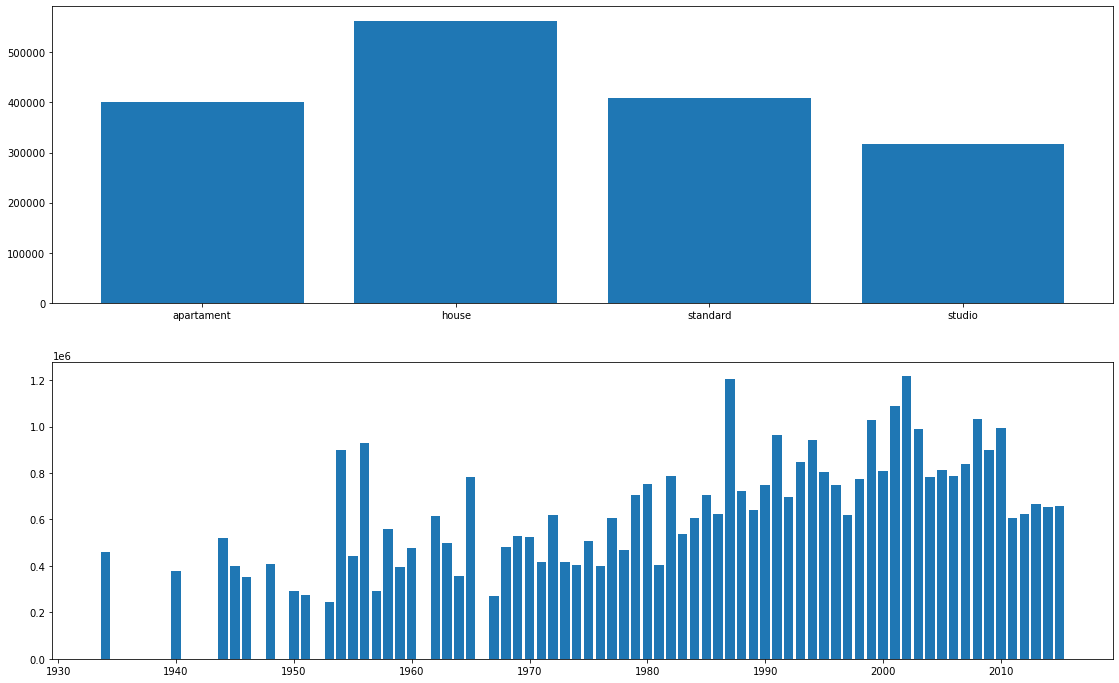

<Figure size 1080x864 with 0 Axes>

In [92]:
fig3 = plt.figure( figsize=( 19,12 ) )
specs3 = gridspec.GridSpec( ncols=1, nrows=2, figure=fig3 )

ax1_3 = fig3.add_subplot( specs3[0,0] )
ax2_3 = fig3.add_subplot( specs3[1,0] )

#first graph

by_dormitory_type = dataAula3[['price','dormitory_type']].groupby( 'dormitory_type' ).mean().reset_index()


ax1_3.bar( by_dormitory_type['dormitory_type'], by_dormitory_type['price'] )  

#second graph

dataAula3['price'] = dataAula3['price'].astype( int64 )
by_renovated_year = dataAula3[dataAula3['yr_renovated']>1930][['price','yr_renovated']].groupby( 'yr_renovated' ).mean().reset_index()


plt.figure( figsize=(15,12) )
ax2_3.bar( by_renovated_year['yr_renovated'], by_renovated_year['price'] )



# Pergunta 10

In [102]:
import plotly.express as px

houses = dataAula3[['id','lat','long','sqft_living15']]

fig = px.scatter_mapbox( houses,
                         lat = 'lat',
                         lon = 'long',
                         size = 'sqft_living15',
                         size_max = 17,
                         zoom = 10)
fig.update_layout( mapbox_style = 'open-street-map' )
fig.update_layout( height = 600, margin = {'r': 0, 't': 0,'l':0,'b':0} )
fig.show()